In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [39]:
def processRegressionData(drug_names=None, path="../Data/Drugs_data/Regression/"):
    if not drug_names:
        drug_names = os.listdir(path)
        drug_names = [drug_names[i] for i in range(len(drug_names)) if drug_names[i].endswith(".csv") and not drug_names[i].__contains__("_preprocessed")]
    for drug_name in drug_names:
        print(drug_name, end="\t")
        data = pd.read_csv(path + drug_name, index_col="Unnamed: 0")
        data.drop(["Primary Cell Line Name",
                   "Target", "Doses (uM)",
                   "Activity Data (median)",
                   "Activity SD",
                   "Num Data",
                   "FitType",
                   "EC50 (uM)", 
                   "Compound", 
                   "Amax", 
                   "ActArea"], axis=1, inplace=True)
        data.dropna(axis=0, how="any", inplace=True)
        data.to_csv(path + drug_name.split(".")[0] + "_preprocessed.csv", index_label="Cell Line")
        print("is finished!")

In [40]:
files = ['TAE684.csv',
         'PHA-665752.csv', 
         'AZD6244.csv',
         'AZD6244.csv',
         'RAF265.csv',
         'Sorafenib.csv',
         'Topotecan.csv']
processRegressionData(drug_names=files)

TAE684.csv	is finished!
PHA-665752.csv	is finished!
AZD6244.csv	is finished!
AZD6244.csv	is finished!
RAF265.csv	is finished!
Sorafenib.csv	is finished!
Topotecan.csv	is finished!


In [36]:
y_data = data['IC50 (uM)']
x_data = data.drop(['IC50 (uM)'], axis=1)

In [33]:
y_data = pd.DataFrame(np.reshape(y_data.as_matrix(), (-1, 1)))
y_data = pd.DataFrame(normalize(y_data.as_matrix(), axis=0, norm='max'))

/Users/Future/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/Future/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


/Users/Future/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


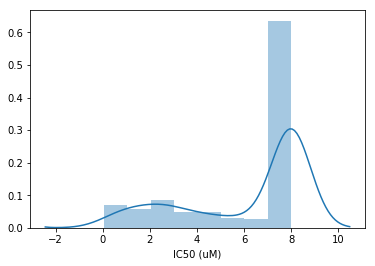

In [37]:
import seaborn as sns
sns.distplot(y_data)
plt.show()

In [12]:
import os
import pandas as pd
import numpy as np
path = "../Data/CCLE/Regression/"
new_path = "../Data/CCLE/Classification/"
files = ["Topotecan_preprocessed.csv"]
for file in files:
    if file.endswith("_preprocessed.csv"):
        print(file, end="\t")
        data = pd.read_csv(path + file, index_col="Cell Line")
        data['class'] = np.nan
#         sd = data['ActArea'].std()
#         mean = data['ActArea'].mean()
        data.loc[data['IC50 (uM)'] > 2, 'class'] = 1 # resistant
        data.loc[data['IC50 (uM)'] <= 2, 'class'] = 0 # sensitive
        data.dropna(how='any', axis=0, inplace=True)
        data.drop(["IC50 (uM)"], axis=1, inplace=True)
        data.to_csv(new_path + file.split("_")[0] + ".csv", index_label="Cell Line")
        print("is finished!")

Topotecan_preprocessed.csv	is finished!


In [42]:
pd.read_csv(path + "TAE684_preprocessed.csv", index_col="Cell Line")

,Cell Line,IC50 (uM),ENSG00000223972.4,ENSG00000227232.4,ENSG00000243485.2,ENSG00000237613.2,ENSG00000268020.2,ENSG00000240361.1,ENSG00000186092.4,ENSG00000238009.2,...,ENSG00000198840.2,ENSG00000210174.1,ENSG00000210176.1,ENSG00000210184.1,ENSG00000210191.1,ENSG00000198786.2,ENSG00000198695.2,ENSG00000210194.1,ENSG00000198727.2,ENSG00000210195.2
0,22RV1_PROSTATE,4.144046,0.0,2316.0,5.0,0.0,0.0,0.0,0.0,63.0,...,46491.0,0.0,0.0,0.0,1.0,495259.0,109429.0,2.0,641461.0,0.0
1,42MGBA_CENTRAL_NERVOUS_SYSTEM,2.827591,0.0,1367.0,10.0,0.0,0.0,0.0,0.0,13.0,...,40583.0,1.0,0.0,0.0,2.0,238703.0,94857.0,1.0,298840.0,0.0
2,5637_URINARY_TRACT,2.473094,1.0,1280.0,0.0,1.0,0.0,0.0,0.0,17.0,...,47676.0,0.0,0.0,1.0,4.0,313719.0,80386.0,0.0,279270.0,0.0
3,639V_URINARY_TRACT,2.217581,2.0,1109.0,11.0,2.0,0.0,0.0,0.0,6.0,...,76577.0,0.0,0.0,2.0,2.0,294413.0,88692.0,2.0,210361.0,0.0
4,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.840449,3.0,1120.0,1.0,0.0,0.0,0.0,0.0,7.0,...,72407.0,2.0,1.0,3.0,0.0,379040.0,89665.0,0.0,533878.0,0.0
5,769P_KIDNEY,6.659093,6.0,1028.0,21.0,27.0,2.0,2.0,0.0,6.0,...,62888.0,0.0,2.0,0.0,1.0,334723.0,131152.0,3.0,503584.0,0.0
6,786O_KIDNEY,8.000000,4.0,1047.0,2.0,5.0,1.0,0.0,0.0,13.0,...,27492.0,0.0,0.0,1.0,0.0,293847.0,85753.0,4.0,286356.0,0.0
7,8305C_THYROID,2.532259,2.0,809.0,2.0,12.0,0.0,0.0,0.0,17.0,...,40347.0,0.0,0.0,0.0,0.0,168610.0,56246.0,0.0,266631.0,0.0
8,8505C_THYROID,6.509104,2.0,841.0,0.0,3.0,0.0,0.0,0.0,14.0,...,25862.0,0.0,2.0,0.0,0.0,221694.0,79170.0,0.0,231472.0,0.0
9,8MGBA_CENTRAL_NERVOUS_SYSTEM,2.379004,1.0,2319.0,19.0,0.0,2.0,0.0,0.0,17.0,...,79258.0,4.0,0.0,2.0,3.0,261740.0,55936.0,2.0,313239.0,1.0


In [52]:
df = pd.read_csv("../Data/GDSC/TableS5C.csv")

In [57]:
df.index = df['Screened Compounds:']
df.drop(['Screened Compounds:'], axis=1, inplace=True)
df

,Erlotinib,Rapamycin,Sunitinib,PHA-665752,MG-132,Paclitaxel,Cyclopamine,AZ628,Sorafenib,VX-680,...,CHIR-99021.1,(5Z)-7-Oxozeaenol,piperlongumine,FK866,BMN-673,rTRAIL,UNC1215,SGC0946,XAV 939,PLX4720 (rescreen)
Screened Compounds:,,,,,,,,,,,,,,,,,,,,,
Discretisation \r\nThreshold (log IC50)/\r\nCell-Lines,1.5671,-3.6395,0.50064,1.9064,-2.0053,-5.6772,3.4712,-0.034145,0.61159,-0.59242,...,2.2151,-0.60596,0.65044,-7.1803,-0.082745,-1.338,1.6932,1.0076,2.2288,2.7717
A253,S,R,R,R,R,R,R,R,R,R,...,R,R,R,R,R,S,R,R,R,R
BB30-HNC,S,R,R,R,R,S,S,R,R,S,...,NaN,NaN,NaN,NaN,R,R,R,R,S,R
BB49-HNC,R,R,R,R,R,R,R,S,R,R,...,R,S,S,R,R,S,R,R,R,R
BHY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,R,R,R,R,R
BICR10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,R,R,R,R,R
BICR22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,R,R,R,R,R
BICR31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BICR78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,R,R,R,R,R,R,R,R,R,R


In [11]:
compounds = os.listdir("../Data/CCLE/Classification/")
compounds = [compounds[i] for i in range(len(compounds)) if compounds[i].endswith(".csv") ]
compounds = sorted(compounds)
for compound in compounds:
    data = pd.read_csv("../Data/CCLE/Classification/" + compound)
    n_resistant = len(data[data['class'] == 1])
    n_sensitive = len(data[data['class'] == 0])
    n_total = n_resistant + n_sensitive
    p_resistant = float(n_resistant / n_total) * 100.0
    p_sensitive = float(n_sensitive / n_total) * 100.0
    print("%s & %d(%.2f" % compound.split(".")[0], n_resistant, p_resistant + "%)" + " & %d(%.2f" % n_sensitive, p_sensitive + "%)")

TypeError: not enough arguments for format string